<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Jun 16 10:55:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.3.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
Контроль дорог, медицина, дополненная реальность.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
Модель становиться частной  и плохо работает на тестовых данных

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
Кросс-валидация, Регуляризация, Раннее прекращение обучения

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [3]:
#Сначала загрузим нужные библиотеки
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


In [4]:
# Теперь загрузим датасет
mydata_train = datasets.MNIST(root = "data", train = True, download=True, transform=ToTensor(), target_transform=None)
mydata_test = datasets.MNIST(root = "data", train = False, download=True, transform=ToTensor(), target_transform=None)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5073723.17it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134265.67it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1271248.42it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11455519.40it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



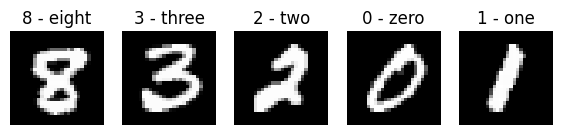

In [18]:
#Выведем изображение
class_names = mydata_train.classes
fig = plt.figure(figsize=(7, 7))
col_image = 5;
for i in range(1, col_image + 1):
  random_idx = torch.randint(0, len(mydata_train), size=[1]).item()
  img, label = mydata_train[random_idx]
  fig.add_subplot(1, col_image, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [24]:
#Загрузим лоадер
from torch.utils.data import DataLoader
#Укажем размер табча
BATCH_SIZE = 32
train_dataloader = DataLoader(mydata_train, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(mydata_test, batch_size=BATCH_SIZE, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [33]:
#Реализуем прошлую модель
class FIRST_MY_MODEL(torch.nn.Module):
  """The model from the last lesson
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.first_block = nn.Sequential(
        #Сначала сверточный слой для двумерных данных
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.second_block = nn.Sequential(
                  nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.result_classification = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*int((28 /2 /2)) * int((28 /2 /2)),
                out_features=output_shape)
    )
  def forward(self, x):
    x = self.first_block(x)
    x = self.second_block(x)
    x = self.result_classification(x)
    return x

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [37]:
my_model = FIRST_MY_MODEL(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
my_model

FIRST_MY_MODEL(
  (first_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (second_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (result_classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [48]:
#Подгрузим нужные библиотеки

from tqdm.auto import tqdm

In [57]:
def train_model_in_device(device, epochs, input_shape, hidden_units, output_shape, train_dataloader, test_dataloader):
    model = FIRST_MY_MODEL(input_shape=input_shape,
                           hidden_units=hidden_units,
                           output_shape=output_shape).to(device)
    # Определим функцию потерь и оптимизатор
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    # Начнем обучение
    for epoch in tqdm(range(epochs)):
        train_loss = 0
        for batch, (X, y) in enumerate(train_dataloader):
            model.train()
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            # Расчет потерь
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()
            # Обнуление градиентов оптимизатора
            optimizer.zero_grad()
            # Обратное распространение ошибки
            loss.backward()
            # Шаг оптимизатора
            optimizer.step()

        # Среднее значение потерь на обучающем наборе
        train_loss /= len(train_dataloader)

        ### Цикл тестирования
        test_loss_total = 0
        # Перевод модели в режим оценки
        model.eval()
        # Включение режима инференса
        with torch.inference_mode():
            for batch, (X_test, y_test) in enumerate(test_dataloader):
                X_test, y_test = X_test.to(device), y_test.to(device)
                test_pred = model(X_test)
                test_loss = loss_fn(test_pred, y_test)
                test_loss_total += test_loss.item()

        # Среднее значение потерь на тестовом наборе
        test_loss_total /= len(test_dataloader)

        print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")
    return model


In [47]:
%%time
train_model_in_device("cpu", 5, 1, 10, 10, train_dataloader, test_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.433 | Test Loss: 0.064
Epoch: 1 | Train Loss: 0.073 | Test Loss: 0.044
Epoch: 2 | Train Loss: 0.056 | Test Loss: 0.042
Epoch: 3 | Train Loss: 0.047 | Test Loss: 0.037
Epoch: 4 | Train Loss: 0.040 | Test Loss: 0.034
CPU times: user 3min, sys: 489 ms, total: 3min
Wall time: 3min 3s


In [49]:
%%time
train_model_in_device(device, 5, 1, 10, 10, train_dataloader, test_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.397 | Test Loss: 0.081
Epoch: 1 | Train Loss: 0.079 | Test Loss: 0.065
Epoch: 2 | Train Loss: 0.061 | Test Loss: 0.054
Epoch: 3 | Train Loss: 0.053 | Test Loss: 0.044
Epoch: 4 | Train Loss: 0.046 | Test Loss: 0.052
CPU times: user 59.4 s, sys: 650 ms, total: 1min
Wall time: 1min 2s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
my_model_work = train_model_in_device(device, 5, 1, 10, 10, train_dataloader, test_dataloader)
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

In [59]:
#Выведем изображение
my_model_work = train_model_in_device(device, 5, 1, 10, 10, train_dataloader, test_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.284 | Test Loss: 0.087
Epoch: 1 | Train Loss: 0.067 | Test Loss: 0.052
Epoch: 2 | Train Loss: 0.052 | Test Loss: 0.045
Epoch: 3 | Train Loss: 0.046 | Test Loss: 0.040
Epoch: 4 | Train Loss: 0.040 | Test Loss: 0.039


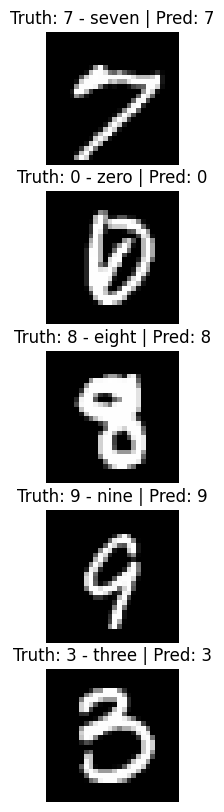

In [67]:
class_names = mydata_train.classes
fig = plt.figure(figsize=(10, 10))
col_image = 5;
for i in range(1, col_image + 1):
  random_idx = torch.randint(0, len(mydata_train), size=[1]).item()
  img, label = mydata_train[random_idx]
  model_predict = torch.argmax(torch.softmax(my_model_work(img.unsqueeze(dim=0).to(device)), dim=1), dim=1)
  fig.add_subplot(col_image, 1, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {class_names[label]} | Pred: {model_predict.item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [68]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.1 MB/s eta 0:00:00
mlxtend version: 0.23.1
0.23.1


In [69]:
# Make predictions across all test data
my_model_work.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = my_model_work(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

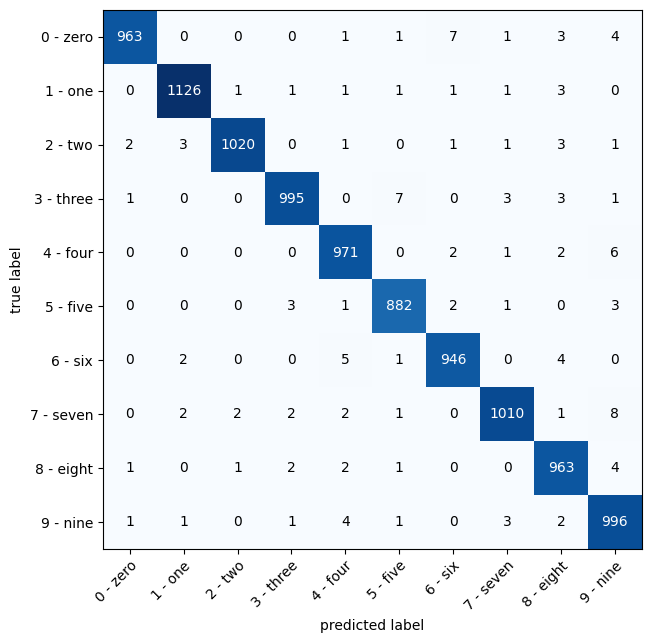

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=mydata_test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [74]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [75]:
layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=4,
                       stride=2,
                       padding=2)

print(f"Random tensor original shape: {random_tensor.shape}")
tensor_in_layer = layer(random_tensor)
print(f"Random tensor through conv layer shape: {tensor_in_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 33, 33])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [76]:
# Теперь загрузим датасет
mydata_train_fashion = datasets.FashionMNIST(root = "data_fashion", train = True, download=True, transform=ToTensor(), target_transform=None)
mydata_test_fashion = datasets.FashionMNIST(root = "data_fashion", train = False, download=True, transform=ToTensor(), target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 9401217.92it/s] 


Extracting data_fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to data_fashion/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 149122.61it/s]


Extracting data_fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data_fashion/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2759893.82it/s]


Extracting data_fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data_fashion/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6188672.11it/s]

Extracting data_fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data_fashion/FashionMNIST/raw



In [77]:
BATCH_SIZE = 32
train_dataloader_fashion = DataLoader(mydata_train_fashion, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader_fashion = DataLoader(mydata_test_fashion, batch_size=BATCH_SIZE, shuffle=False)

In [78]:
my_model_work = train_model_in_device(device, 5, 1, 10, 10, train_dataloader_fashion, test_dataloader_fashion)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.559 | Test Loss: 0.404
Epoch: 1 | Train Loss: 0.360 | Test Loss: 0.358
Epoch: 2 | Train Loss: 0.322 | Test Loss: 0.335
Epoch: 3 | Train Loss: 0.304 | Test Loss: 0.363
Epoch: 4 | Train Loss: 0.289 | Test Loss: 0.311


In [87]:
# Make predictions across all test data
my_model_work.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader_fashion)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = my_model_work(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)


0it [00:00, ?it/s]

10000

In [88]:
import numpy as np
wrong_pred_indexes = np.where(y_preds != mydata_test_fashion.targets)[0]
len(wrong_pred_indexes)

1100

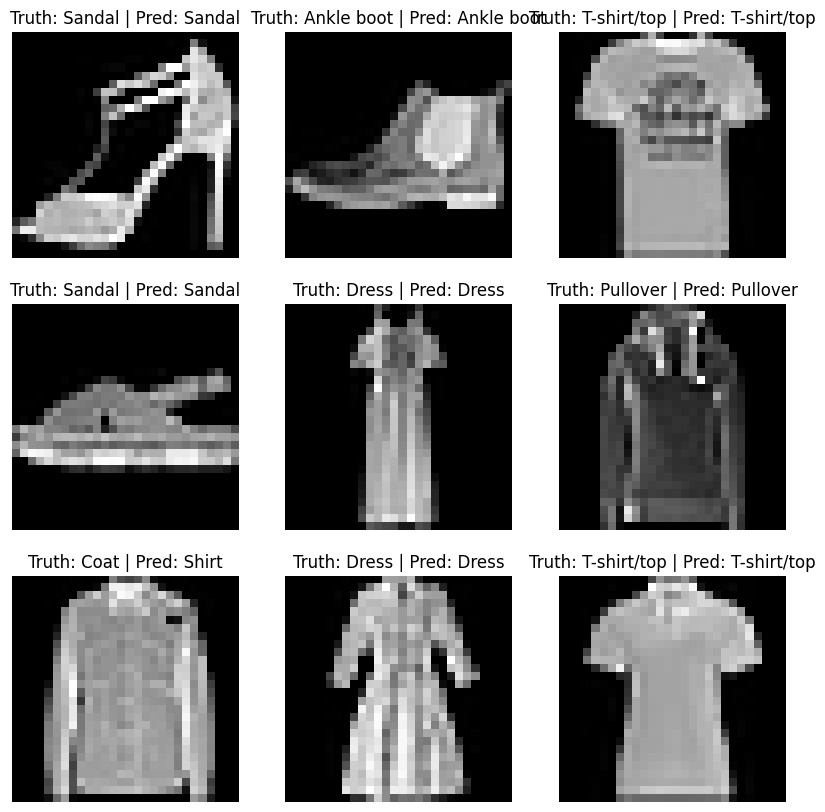

In [86]:
class_names = mydata_train_fashion.classes
fig = plt.figure(figsize=(10, 10))
col_image = 3;
rows = 3
for i in range(1, rows * col_image + 1):
  random_idx = torch.randint(0, len(mydata_train_fashion), size=[1]).item()
  img, label = mydata_train_fashion[random_idx]
  model_predict = torch.argmax(torch.softmax(my_model_work(img.unsqueeze(dim=0).to(device)), dim=1), dim=1)
  fig.add_subplot(col_image, rows, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {class_names[label]} | Pred: {class_names[model_predict.item()]}")
  plt.axis(False);